In [1]:
!pip uninstall nfem

# *Main script for the Tutorial_1 for Lecture Course:*

## Non-Linear Finite Element Analysis
(https://campus.tum.de/tumonline/wbLv.wbShowLVDetail?pStpSpNr=950342272&pSpracheNr=2&pMUISuche=FALSE)

Lecturer: 
> *Prof. Dr. -Ing. Kai-Uwe Bletzinger*  
>> *Lehrstuhl für Statik  
Technische Universität München  
Arcisstr. 21  
D-80333 München*  

Assistants: 
> *Armin Geiser M.Sc.* (armin.geiser@tum.de)  
and  
*Aditya Ghantasala M.Sc.* (aditya.ghantasala@tum.de)  

In [2]:
# import sys
# sys.path.append('C:/Users/KNR/Desktop/NFEM_Teaching')

!pip install git+https://github.com/ge73xip/nfem.git   # Acess Denied in GitLab

  Cloning https://github.com/ge73xip/nfem.git to /tmp/pip-req-build-uftkqybo
  Running command git clone -q https://github.com/ge73xip/nfem.git /tmp/pip-req-build-uftkqybo
  Created wheel for nfem: filename=nfem-1.4-cp36-none-any.whl size=43332 sha256=a6d978138840b6442a06c2a4f060a94b844859949ea95b4a26ad008c70593931
  Stored in directory: /tmp/pip-ephem-wheel-cache-asx3c1bz/wheels/ed/10/ef/4da7cd5a4b60af6cc117c70118d1ad51043fb1a3ab68d5151f
Successfully built nfem


## 1. Adding path of *nfem* to import modules  

 - *nfem : is the module for Non-Linear FEM where all the necessary tools and algorthims are and will be implemented*

In [3]:
# import necessary modules
from nfem import *
import matplotlib.pyplot as plt


--------------------------------------------------------------------------------

                       _   ________________  ___
                      / | / / ____/ ____/  |/  /
                     /  |/ / /_  / __/ / /|_/ /
                    / /|  / __/ / /___/ /  / /
                   /_/ |_/_/   /_____/_/  /_/  Teaching Tool

  Authors:   Armin Geiser, Aditya Ghantasala, Thomas Oberbichler, Klaus Sautter
             Mahmoud Zidan
  Copyright: © 2018 TUM Statik
  Version:   1.6

  This is a teaching tool! All results without warranty.

--------------------------------------------------------------------------------



In [4]:
!pip show nfem

Name: nfem
Version: 1.4
Summary: UNKNOWN
Home-page: https://github.com/ge73xip/nfem.git
Author: ge73xip
Author-email: ge73xip@mytum.de
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: pyqt5, numpy, matplotlib
Required-by: 


## 2. Preprocessing
### *2.1 Creation of the Model*

In [0]:
model = Model('Two-Bar Truss')

# Add nodes 
model.add_node(id='A', x=0, y=0, z=0)
model.add_node(id='B', x=1, y=1, z=0)
model.add_node(id='C', x=2, y=0, z=0)

# Add elements
model.add_truss_element(id=1, node_a='A', node_b='B', youngs_modulus=1, area=1)
model.add_truss_element(id=2, node_a='B', node_b='C', youngs_modulus=1, area=1)

# Add dirichlet boundary conditions
model.add_dirichlet_condition(node_id='A', dof_types='uvw', value=0)
model.add_dirichlet_condition(node_id='B', dof_types='w', value=0)
model.add_dirichlet_condition(node_id='C', dof_types='uvw', value=0)

# Add load conditions
model.add_single_load(id='load_1', node_id='B', fv=-1)

### 2.2 Define the load-curve that is used for Linear and Non-Linear analysis

In [0]:
load_curve = [0.01,
              0.02,
              0.03,
              0.05,
              0.10,
              0.136,
              0.15,
              0.30,
              0.50,
              0.70,
              1.00]

## 3. Analysis Type

Some things to recall from linear algebra:

> - Solving a linear equation : $ax + b = 0$, we get    
>> --> *one value for the unknown*   

> - Solving a quadratic equation : $ax2 + bx + c = 0$, we get   
>> --> *two possible values for the unknown*  
    
> - Solving a cubic equation : $ax3 + bx2 + cx + d = 0$, we get  
>> --> *three possible values for the unknown* 

> - Solving a n-order polynomial equation, we get 
>> --> *n possible values for the unknown* 

### *3.1 Linear analysis*

In linear analysis the force-displacement response curve is *linear*. Therefore, if the applied forces are doubled, the resulting displacments and the corresponding internal stresses also doubles. 

Upon discretization of a linear static problem we generally obtain a *linear system of equations* 

Say if we have a linear static problem having 3 dofs :  
3 dofs --> 3 unknowns --> 3 independent *linear* equations

\begin{equation}
    \begin{array}{|||}
        k_{11}u_1 + k_{12}u_2 + k_{13}u_3  & = &  f_1\\  
        k_{21}u_1 + k_{22}u_2 + k_{32}u_3  & = &  f_2\\
        k_{31}u_1 + k_{32}u_2 + k_{33}u_3  & = &  f_3
    \end{array}
    \hspace{0.2cm} \Rightarrow \hspace{0.2cm}  
    \begin{bmatrix}
        k_{11} & k_{12} & k_{13}\\
        k_{21} & k_{22} & k_{23}\\
        k_{31} & k_{32} & k_{33}
     \end{bmatrix}
    \cdot
    \begin{Bmatrix}
        u_1\\
        u_2\\
        u_3
    \end{Bmatrix}
    = 
    \begin{Bmatrix}
        f_1\\
        f_2\\
        f_3
    \end{Bmatrix}
    \hspace{0.2cm} \Rightarrow \hspace{0.2cm}
    \textbf{[K]} . \textbf{\{u\}} =  \textbf{\{f\}}
\end{equation}

In the above expressions, notice that the unknown displacments u_1,u_2 and u_3 are implicitly raised to the power 1 --> This is because we considered the system to be *linear*.

Solving this system of equation results in only one possible value for u_1, u_2 and u_3. The system has only one unique solution vector {**u**} --> *only one possible combination of u_1, u_2 and u_3.* 

In general,  
if a linear system has *n* dofs --> n unknowns --> n equations.  
But upon solving each dof has only one possible value and hence only one unique solution vector {**u**} --> only one possible combination of u_1, u_2,......, u_n.   

Therfore irrespective of the number of dofs, a linear system will always have only one unique solution vector {**u**}. Hence setting up linear equation solvers for $\textbf{[K]} . \textbf{\{u\}} =  \textbf{\{f\}}$ is a perfectly sensible thing to do. 

*Remark* : We will see further below why setting up equation solvers for *non-linear system of equations* is not well suited.


In [7]:
linear_model = model

for lam in load_curve:
    # create a new model for each solution step
    linear_model = linear_model.get_duplicate()
    # define the load factor
    linear_model.lam = lam
    # perform a linear solution
    linear_model.perform_linear_solution_step()


Start linear solution step...
lambda : 0.01

Start linear solution step...
lambda : 0.02

Start linear solution step...
lambda : 0.03

Start linear solution step...
lambda : 0.05

Start linear solution step...
lambda : 0.1

Start linear solution step...
lambda : 0.136

Start linear solution step...
lambda : 0.15

Start linear solution step...
lambda : 0.3

Start linear solution step...
lambda : 0.5

Start linear solution step...
lambda : 0.7

Start linear solution step...
lambda : 1.0


### *3.2 Non-Linear analysis*

In non-linear analysis, the force-displacment response is non-linear. Therefore if the applied forces are doubled, the resulting displacments and corresponding internal stresses do not change proportionately.

Upon discretization of a non-linear static problem we generally obtain a non-linear system of equations

Say if we have a non-linear static problem having 3 dofs and the oder of the non-linearity is 2 (i.e Quadratic) :  
3 dofs --> 3 unknowns --> 3 independent *Quadratic* equations

\begin{equation}
    \begin{array}{|||}
        k_{11}u^2_1 + k_{12}u^2_2 + k_{13}u^2_3  & = &  f_1\\  
        k_{21}u^2_1 + k_{22}u^2_2 + k_{32}u^2_3  & = &  f_2\\
        k_{31}u^2_1 + k_{32}u^2_2 + k_{33}u^2_3  & = &  f_3
    \end{array}
    \hspace{0.2cm} \Rightarrow \hspace{0.2cm}  
    \begin{bmatrix}
        k_{11} & k_{12} & k_{13}\\
        k_{21} & k_{22} & k_{23}\\
        k_{31} & k_{32} & k_{33}
     \end{bmatrix}
    \cdot
    \begin{Bmatrix}
        u^2_1\\
        u^2_2\\
        u^2_3
    \end{Bmatrix}
    = 
    \begin{Bmatrix}
        f_1\\
        f_2\\
        f_3
    \end{Bmatrix}
\end{equation} 

In the above expressions, notice that the unknown displacments u_1,u_2 and u_3 are raised to the power 2 --> This is because order of the non-linearity was considered to be 2.

Solving this system of equations results in two possible values for each unknown u_1, u_2 and u_3. 
Now the system has $2 * 2 * 2 = 2^3 = 8$ possible solution vectors {**u**}.
If the same system had cubic non-linearity, then we would have $3 * 3 * 3 = 3^3 = 27$ possible solution vectors.
If order of non-linearity is 4, then $4 * 4 * 4 = 4^3 = 64$ possible solution vectors. 

In general,  
$p^n$ possible solutions for a system having *p* order of non-linearity and *n* dofs. For the same dofs as the order of non-linearity increases,  the possible solutions also increases exponentially.

Imagine a system having 1000 dofs with 3rd order non-linearity, then the number of possible solution vectors will be $3^{1000}$. These large number of possible solutions immediately poses the following problems:  
- Requires large computational effort
- Of these possible solutions, only few may have physical meaning. So identifying only those and eliminating others is a complete waste of time 

In simple words, using system of equations to solve a non-linear system leads to *combinatorial difficulty* and hence we need a different approach for non-linear analysis. We use a concept called as *Incremental Analysis* to solve non-linear systems.

*Incremental Analysis* is started from an easily computable solution - for example a linear solution and then using equilibrium try to follow the behaviour of the system  as actions applied to the system are changed by small steps called increments. 

It is important to note that the stiffness matrices in non-linear analysis undergo revision at the beginning of each step whereas it remains constant throughout in a linear analysis.


In [8]:
non_linear_model = model

for lam in load_curve:
    #create a new model for each solution step
    non_linear_model = non_linear_model.get_duplicate()
    # predict a solution
    non_linear_model.predict_tangential(strategy='lambda', value=lam)
    # perform a non-linear solution step
    non_linear_model.perform_non_linear_solution_step(strategy='load-control')
    


Start non linear solution step...
  Newthon-Raphson converged in step 2.
  Residual norm: 1.0159367009460185e-07.
Solution found after 2 iteration steps.
Det(K): 0.47161006573215103

Start non linear solution step...
  Newthon-Raphson converged in step 2.
  Residual norm: 1.274128223864579e-07.
Solution found after 2 iteration steps.
Det(K): 0.4429815536533704

Start non linear solution step...
  Newthon-Raphson converged in step 2.
  Residual norm: 1.6276557162145378e-07.
Solution found after 2 iteration steps.
Det(K): 0.4140678998824856

Start non linear solution step...
  Newthon-Raphson converged in step 2.
  Residual norm: 3.7007183099485585e-06.
Solution found after 2 iteration steps.
Det(K): 0.35514276062473465

Start non linear solution step...
  Newthon-Raphson converged in step 3.
  Residual norm: 1.1836793810393598e-06.
Solution found after 3 iteration steps.
Det(K): 0.19511026330561687

Start non linear solution step...
  Newthon-Raphson converged in step 6.
  Residual nor

## 4. Postprocessing

### 4.1 *Force-displacment curve*

The force-displacement curve *(also known as RESPONSE CURVE)* is plotted below for linear and non-linear models.

1. The plot for linear model <font color='blue'>*(blue plot)*</font> has a linear relation as expected. 

>But it is interesting to analyse the plot of non-linear model <font color='orange'>*(orange plot)*</font>

2. Following observations can be made regarding the non-linear analysis :  

    * In the beginning, the non-linear response is similar to that of the linear response  
    * Later it deviates and develops a plateau *(horizontal region)* where the structure undergoes large deformation without any increase in the load. This process is called as **snap-through**
    * After the snap through, the displacement grows with increase in the load
    * Further, the final displacement is much larger in comparison to that of the linear analysis for the same amount of load. So it is important that the engineer is able to distinguish the structure's behaviour is linear or non-linear.

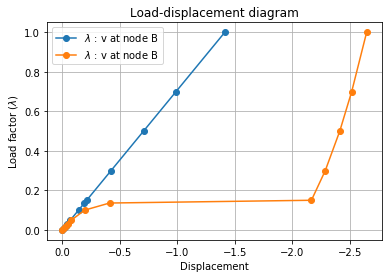

In [9]:
# To make the plot interactive (zoom, pan, save)
# %matplotlib notebook

# Plot the response-curve
plot = Plot2D()
plot.add_load_displacement_curve(linear_model, dof=('B', 'v'), show_iterations=False)
plot.add_load_displacement_curve(non_linear_model, dof=('B', 'v'), show_iterations=False)
# plot.add_load_displacement_curve(non_linear_model, dof=('B', 'v'), show_iterations=True)
plot.invert_xaxis()
plot.show(block=True)

### 4.2 *Static Plot for Linear Model*

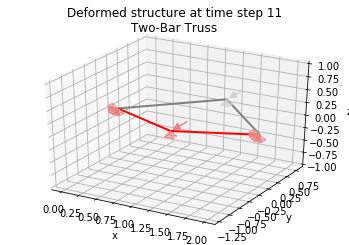

In [14]:
show_deformation_plot(linear_model)

### 4.3 *Static Plot for Non-Linear Model*

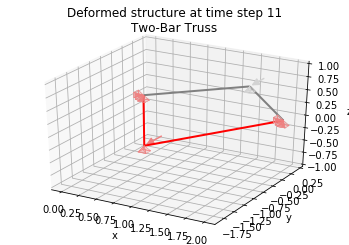

In [15]:
show_deformation_plot(non_linear_model)

It is evident in the above plot that non-linear analysis results in larger displacement in comparison to linear analysis

In [0]:
# animate_linear = show_animation(linear_model)
# HTML(animate_linear.to_html5_video())
# rc('animation', html='html5')
# animate_linear

In [0]:
# animated plot
# animate_nlinear = show_animation(non_linear_model)
# HTML(animate_nlinear.to_html5_video())      # embed animation as HTML
# rc('animation', html='html5')               
# animate_nlinear     # animation appears